# Intro to Jupyter Notebooks

Currently we are using a jupyter notebook.  This format can support either Julia, Python, or R.  The format is quite similiar to that used in the propriety software Mathematica.  

We have two types of cells:
* Markdown cells
* Code Cells

### Markdown Cells

This is a <b>Markdown Cell</b>.  Here we write text or add pictures to describe what we are doing.  In raw format, everything is easily readable, but the computer can also render it to look even nicer with headings, lists,<b>bold</b>,<i>italic</i>, tables, links, and other formatting.  

I can even write equations.
\begin{equation}
x_0 = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}
\end{equation}
Equations use LaTeX syntax.  LaTeX is a document preparation language used by those in STEM.  It's how we make all those awesome looking papers.  It also automatically handles our citations for us :)  Check out ... to create documents online.  

I can also write code inline `x+=1` or in block style

    
    for ii in 1:n
        x+=1
    end

### Coding Cells

You can evaluate coding cells by pushing <b>Shift-Enter</b>.

Next to Coding Cells, `In[ ]` specifies the code that will be executed, and `Out[]` specifies the output of the given cell.  The number specifies the order in which the code got evaluated.  

<b>Important</b>: Global variables get edited each time you evaluate a new cell.  So order of evaluation matters.

### Julia's Packages

Julia uses external packages, much like Python, to supplement its core functionality.  <b>PyPlot</b> imports plotting functionality from Python's PyPlot with the package PyCall.  [Julia](http://pkg.julialang.org/) maintains a complete list of supported external packages.  While many are quite specialized or out of date, some are incredibly useful, like different plotting tools, curve fitting, integrators, differential equations, accelerators, working with different file types, and more.  

If you need to run a jupyter notebook on your machine instead of on JuliaBox, you would be using the IJulia package.

In [4]:
# Update packages
Pkg.update()

# Add a new package to your repository
# Unnecessary if already added
Pkg.add("PyPlot")

# Load PyPlot into 
using PyPlot

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Nothing to be done


# Projectile Motion

![Spaceship](spaceship.svg)

\begin{equation}
\text{distance}= \text{rate}\times\text{time}\;\;\;\; \implies \;\;\;\;\;
x(t) = v_x t
\end{equation}
BUT
\begin{equation}
y(t) = v_y (t) t \;\;\;\;\;\text{?}
\end{equation}
NO! How do we solve this? 

First let's write down the infinitesimal, exact version of the equations.
\begin{equation}
\frac{d x}{dt} = v_x \;\;\; \frac{dy}{dt} = v_y
\end{equation}
\begin{equation}
\frac{d v_x}{dt} = 0 \;\;\;\; \frac{d v_y}{dt}= g
\end{equation}

In order to put this into an equation, we take the derivative and break it into a courser grained version
\begin{equation}
\frac{dx}{dt} \approx \frac{ \Delta x}{\Delta t}.
\end{equation}
Now because $\Delta x$ and $\Delta t$ have actual sizes instead of being infinitesimally small, the computer can deal with them.  

Now we take lots of baby steps of $\Delta t$ over our time interval to change the position with the changing velocity.
\begin{equation}
y(t_{n+1})= y(t_n)+ v_y(t_n) \Delta t
\end{equation}

Bonus note:  Different types of algorithms,like symplectic, evaluate the velocity at different time points.


### A cell of parameters we need to enter

In [5]:
θ=π/4 #angle with respect to horizontal
v0=10

x0=0;
y0=0;

t0=0 #initial time
tf=2 #final time
dt=1e-3 #time step size

0.001

### Preliminary calculation of important variables

In [6]:
g=9.8 #m/s^2

vx0=v0*cos(θ) # x component of velocity at initial time step
vy0=v0*sin(θ) # y component of velocity at initial time step

t=collect(t0:dt:tf) # creates an array that holds each time point
nt=length(t) #the number of time steps we willl have

2001

### Initialization of Variables

In [7]:
#initializing empty vectors that will hold position and velocity at each time step
x=zeros(t)
y=zeros(t)
vx=zeros(t)
vy=zeros(t)

x[1]=x0
y[1]=y0
vx[1]=vx0
vy[1]=vy0

7.071067811865475

### Loop of Time Steps

In [114]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    vx[ii]=vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt
end

## Plotting

<b>Tips from Expierence</b>: Always include x and y labels, title, legends, and relevant units <b>on the graph</b>.  

The graph might seem obvious to you now, but the labeling might not seem obvious to you next week, next month, or next year.  And it probably won't seem obvious to someone else looking at your work.

So I'll be taking a few extra lines to make sure I include all that.

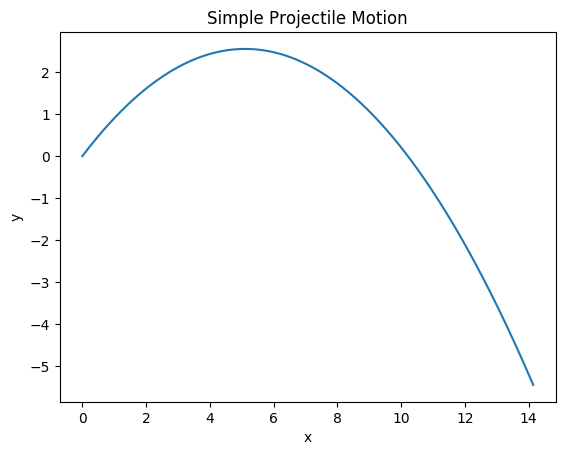

PyObject <matplotlib.text.Text object at 0x000000002D8E2E48>

In [115]:
plot(x,y)

xlabel("x")
ylabel("y")
title("Simple Projectile Motion")

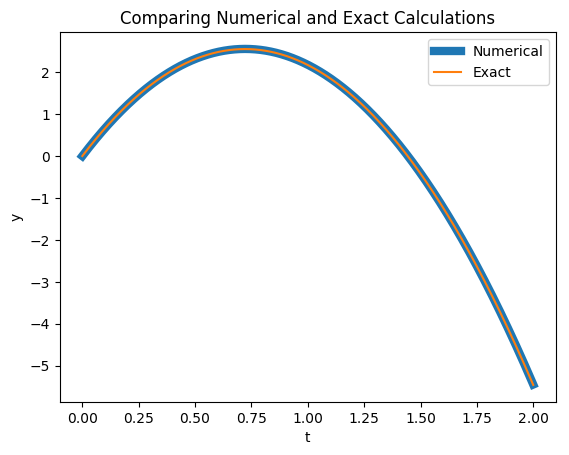

PyObject <matplotlib.text.Text object at 0x000000002D8D84A8>

In [116]:
yexact=-g/2.*t.^2.+vy0.*t

plot(t,y,linewidth=6,label="Numerical")
plot(t,yexact,label="Exact")

xlabel("t")
ylabel("y")
legend()
title("Comparing Numerical and Exact Calculations")

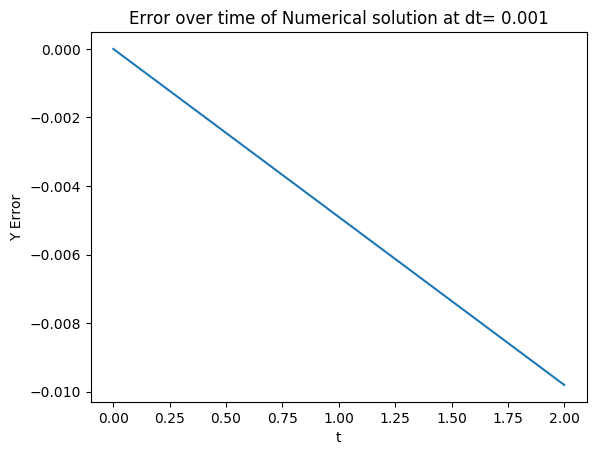

PyObject <matplotlib.text.Text object at 0x000000002DD19278>

In [117]:
plot(t,yexact-y)

xlabel("t")
ylabel("Y Error")
title("Error over time of Numerical solution at dt= $dt")

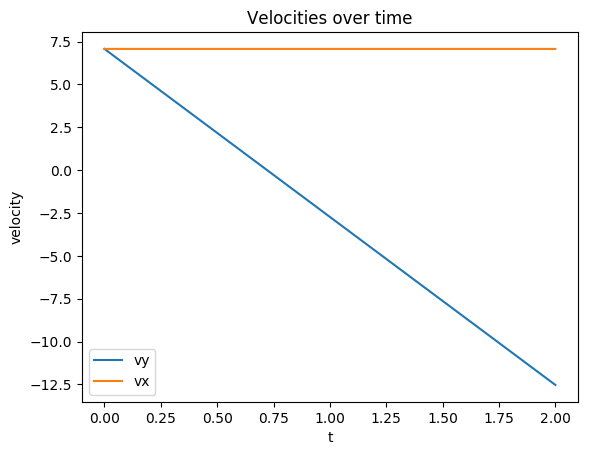

PyObject <matplotlib.text.Text object at 0x000000002E045A58>

In [118]:
plot(t,vy,label="vy")
plot(t,vx,label="vx")

xlabel("t")
ylabel("velocity")
legend()
title("Velocities over time")


## But what if there is a surface?

If we place a surface at $y=0$, or any other location, the ball won't just keep on falling forever.  We can choose two types of actions when it encounters the surface

* <b>Elastic Collision:</b> The ball bounces with the same amount of kinetic energy, just in the opposite direction
* <b>Inelastic Collision:</b> The ball looses a fraction of its energy in the collision.
    * At an extreme of this case, the ball looses all its energy.
    
We use an `if` statement to determine when it encounters the surface.

In [119]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    if y[ii]<0
        println("Hit the surface at t: ",t[ii],"\t x: ",x[ii])
        vy[ii-1]=-vy[ii-1]
        y[ii]=y[ii-1]+vy[ii-1]*dt
    end
    
    vx[ii]=vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt
end

Hit the surface at t: 1.445	 x: 10.217692988145673


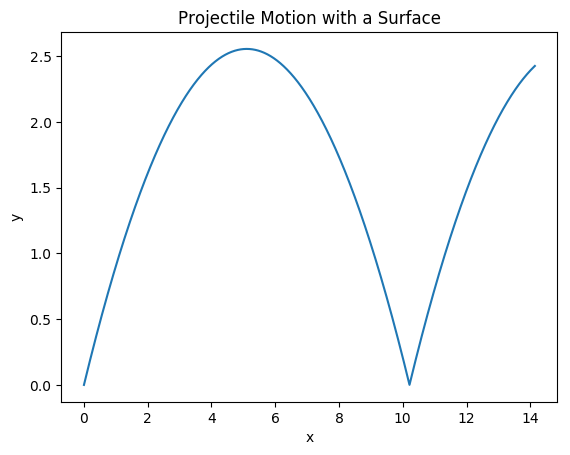

PyObject <matplotlib.text.Text object at 0x000000002E117CC0>

In [120]:
plot(x,y)

xlabel("x")
ylabel("y")

title("Projectile Motion with a Surface")

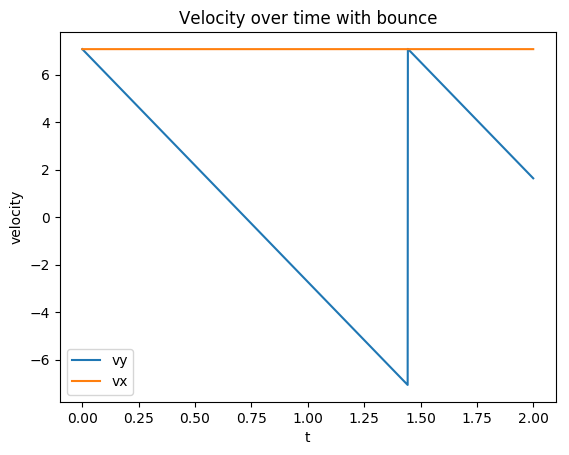

PyObject <matplotlib.text.Text object at 0x000000003305ABA8>

In [122]:
plot(t,vy,label="vy")
plot(t,vx,label="vx")

xlabel("t")
ylabel("velocity")
legend()
title("Velocity over time with bounce")

## Why do we do analytics at all?

So we just found our intercepts and made a bunch of nice graphs without ever having to do any algebra.  Why do we force you to slog through it?

Because you need to know what to expect to know when it's completely going wrong or when something might fail numerically.  

Let's do the same things but for a range of different time steps to show some of the limitations of numerical analysis.

In [ ]:
# Lets 

In [123]:
dta=[.001,.01,.1,.2]
na=floor(Int,(tf-t0)./dta)

ta=zeros(Float64,maximum(na),length(dta))

xa=zeros(ta)
ya=zeros(ta)
vxa=zeros(ta)
vya=zeros(ta)

xa[1,:]=x0
ya[1,:]=y0
vxa[1,:]=vx0
vya[1,:]=vy0

for jj in 1:length(dta)
    dt=dta[jj]
    ta[1:na[jj],jj]=linspace(t0,tf,na[jj])
    
    for ii in 2:na[jj]
        xa[ii,jj]=xa[ii-1,jj]+vxa[ii-1,jj]*dt
        ya[ii,jj]=ya[ii-1,jj]+vya[ii-1,jj]*dt

        if ya[ii,jj]<0
            vya[ii-1,jj]=-vya[ii-1,jj]
            ya[ii,jj]=ya[ii-1,jj]+vya[ii-1,jj]*dt
        end

        vxa[ii,jj]=vxa[ii-1,jj]
        vya[ii,jj]=vya[ii-1,jj]-g*dt
    end
end



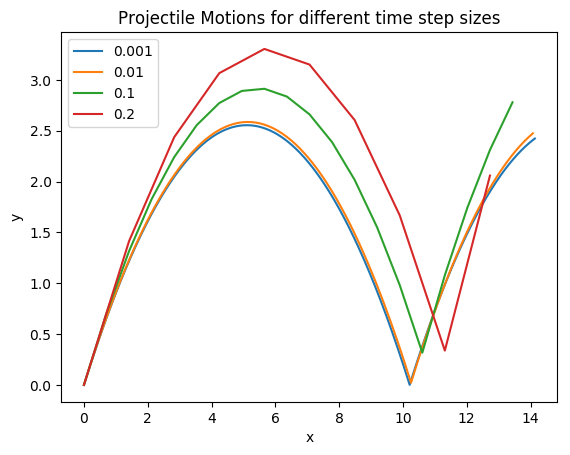

PyObject <matplotlib.text.Text object at 0x00000000331E67B8>

In [124]:
for ii in 1:length(dta)
    plot(xa[1:na[ii],ii],ya[1:na[ii],ii],label=dta[ii])
end

xlabel("x")
ylabel("y")
legend()
title("Projectile Motions for different time step sizes")

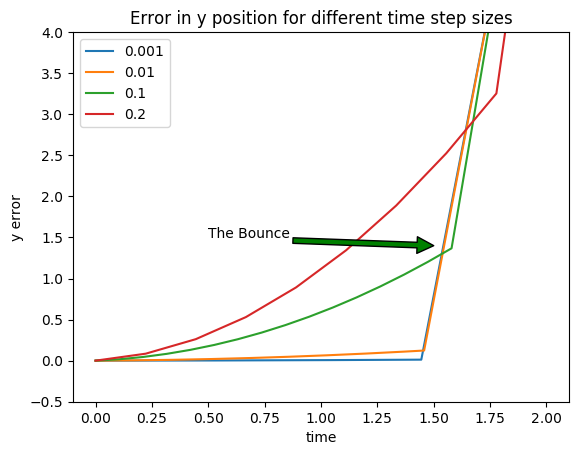

PyObject <matplotlib.text.Text object at 0x0000000033847E10>

In [126]:
yexact=-g/2.*ta.^2.+vy0.*ta
yerr=ya-yexact
ylim(-.5,4)

for ii in 1:length(dta)
    plot(ta[1:na[ii],ii],yerr[1:na[ii],ii],label=dta[ii])
end

annotate("The Bounce",
    xy=[1.5, 1.4 ],
    xytext=[.5, 1.5],
   xycoords="data",
   arrowprops=Dict("facecolor"=>"green"))

xlabel("time")
ylabel("y error")
legend()
title("Error in y position for different time step sizes")

## But what about Air Resistence?  

Real objects encounter air resistence proportional to velocity.  This can't be solved analytically, but our code can handle it really easily.

In [26]:
R=.005

0.005

In [27]:
E=zeros(t)
E[1]=.5*(vx0^2+vy0^2)

for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
     if y[ii]<0
        println("Hit the surface at t: ",t[ii],"\t x: ",x[ii])
        vy[ii-1]=-vy[ii-1]
        y[ii]=y[ii-1]+vy[ii-1]*dt
    end
    
    vx[ii]=vx[ii-1]-R*vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt-R*vy[ii-1]
    
    E[ii]=g*y[ii]+.5*(vx[ii]^2+vy[ii]^2)
end

Hit the surface at t: 0.913	 x: 1.3996593831476127
Hit the surface at t: 1.219	 x: 1.4110741350994296
Hit the surface at t: 1.419	 x: 1.4130615249792806
Hit the surface at t: 1.569	 x: 1.413670401237195
Hit the surface at t: 1.691	 x: 1.4139188865272196
Hit the surface at t: 1.794	 x: 1.4140377206804202
Hit the surface at t: 1.883	 x: 1.4141010044574907
Hit the surface at t: 1.962	 x: 1.4141378094455954


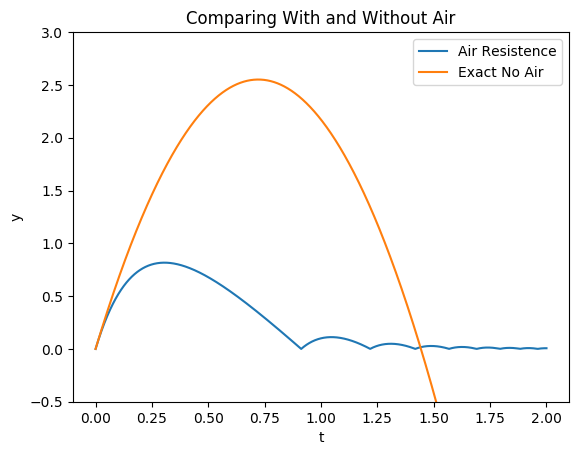

PyObject <matplotlib.text.Text object at 0x0000000028DAFEB8>

In [32]:
yexact=-g/2.*t.^2.+vy0.*t

plot(t,y,label="Air Resistence")
plot(t,yexact,label="Exact No Air")
ylim(-.5,3)

xlabel("t")
ylabel("y")
legend()
title("Comparing With and Without Air")

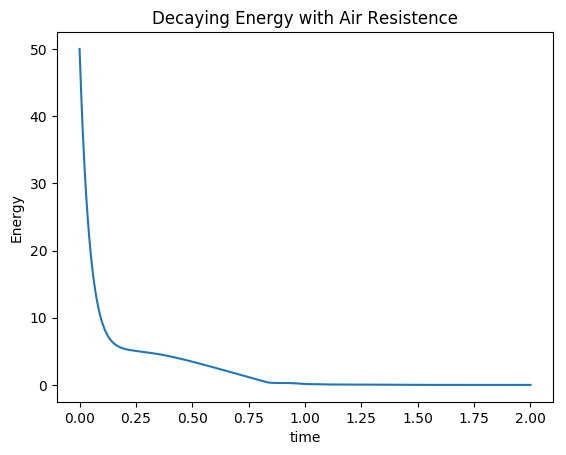

PyObject <matplotlib.text.Text object at 0x0000000027FEC550>

In [22]:
plot(t,E)

xlabel("time")
ylabel("Energy")
title("Decaying Energy with Air Resistence")